In [1]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Mouse C3KO-RichLi snRNA
####  2023-05-17 by Yi Zhao (Texas Heart Institute, US)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Initiate  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Ver <- '0'
Step <- 'PART10_Annotation_Global'
Project <- '2023_neoc3ko_rli'

Code_dir <- paste0('/Volumes/shire/project/', Project, '/code/mouse_v', Ver, '/')

source(Sys.readlink(paste0(Code_dir, 'src/bioinformatics.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scRNAseq.R')))
source(Sys.readlink(paste0(Code_dir, 'src/scATACseq.R')))
source(paste0(Code_dir, 'mouse_v', Ver, '.helper_functions.R'))

InitiateProject('Rivendell', Ver, Step, 'mouse', Project, 'shire')

In [2]:
plan("multisession", workers = 12)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART06.scvi_integration_clustered.srt.rds')
srt.bkp <- srt
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [3]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Use Louvain res1.5 and scVI umap  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
PlotPDF('0.1.umap.dr_and_res_of_choice', 10, 20)
DimPlot2(srt, reduction = 'scVI_umap', group.by = 'Cluster_leiden_res1.5', cols = mycol_70, label = T, repel = T) /
        DimPlot2(srt, reduction = 'scVI_umap', group.by = 'Doublet_SC', cols = mycol_10)
dev.off()

srt <- DietSeurat(srt, counts = T, data = T, assays = c('RNA', 'ATAC'),
                  scale.data = F, dimreducs = c('scVI_umap', 'scVI'))
srt@reductions <- srt@reductions[c('scVI', 'scVI_umap')]
Idents(srt) <- 'Cluster_leiden_res1.5'
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



pdf 
  2

In [4]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Label doublet clusters  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
p1 <- CountCellBarPlot(srt, group.var = 'Cluster_leiden_res1.5', stack.var = 'Doublet_SC', percentage = T)$plot
p2 <- VlnPlot2(srt, features = 'Doublet_SC_score', sort = T, group.by = 'Cluster_leiden_res1.5')
p3 <- DimPlot2(srt, reduction = 'scVI_umap', group.by = 'Cluster_leiden_res1.5', cols = mycol_70, label = T, repel = T)
p4 <- DimPlot2(srt, reduction = 'scVI_umap', group.by = 'Doublet_SC', cols = mycol_10, label = F, repel = F)

PlotPDF('01.1.bar.doublet_rich_clusters', 30, 30)
print((p1 + p2)/(p3 + p4))
dev.off()

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(stack.var)

  # Now:
  data %>% select(all_of(stack.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(group.var)

  # Now:
  data %>% select(all_of(group.var))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."
`summarise()` has grouped output by 'Doublet_SC'. You can override using the
`.groups` argument.
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FAL

pdf 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

`summarise()` has grouped output by 'Non_ambiguous'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Doublet_SC'. You can override using the
`.groups` argument.


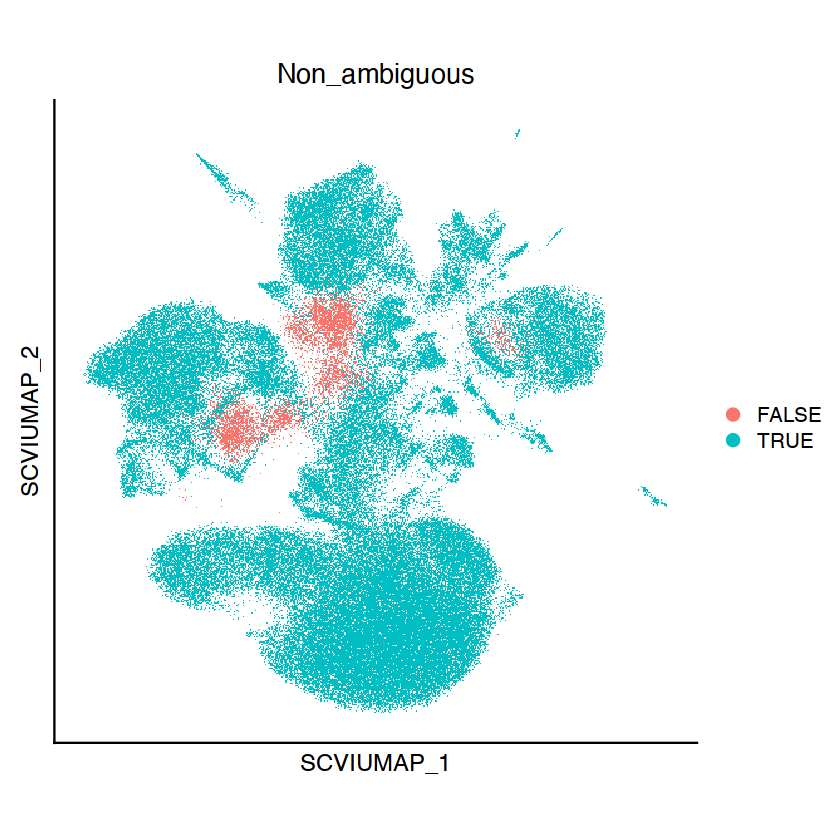

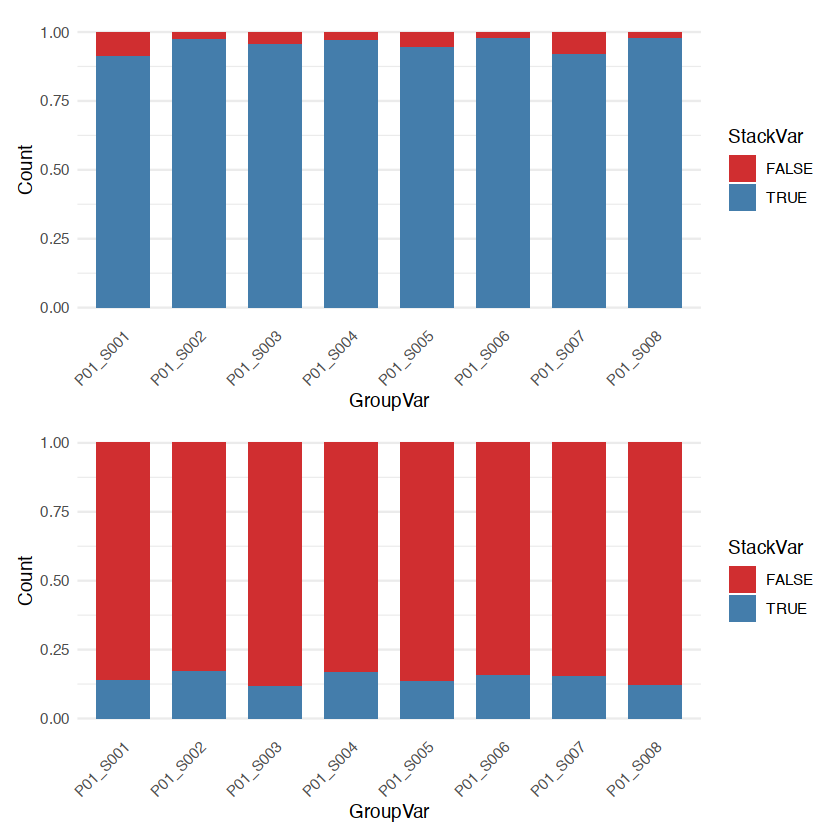

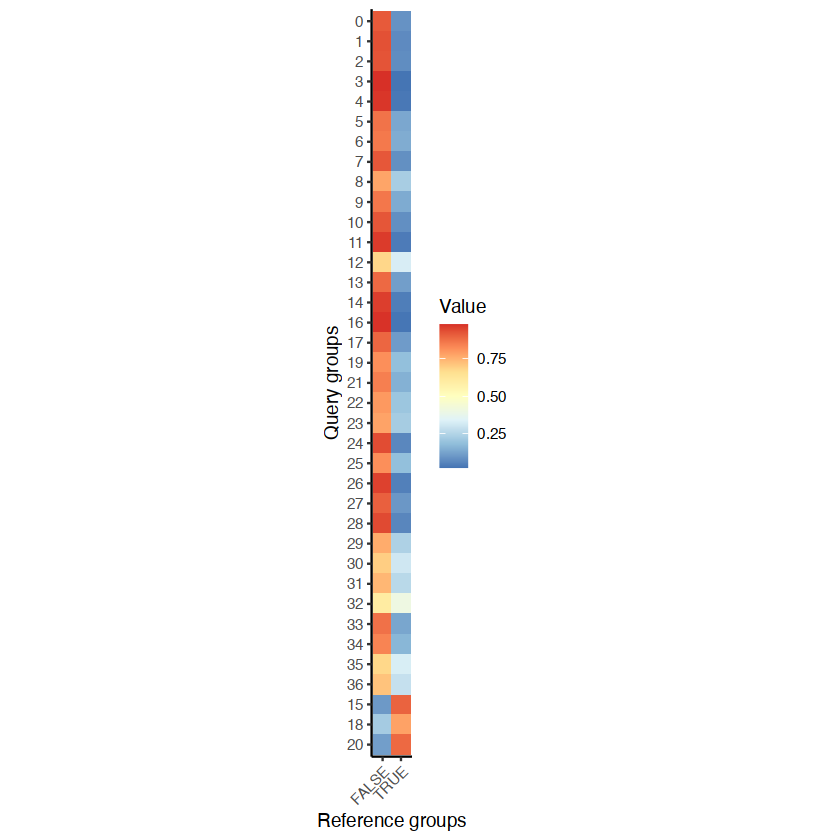

In [5]:
srt$Non_ambiguous <- T
srt$Non_ambiguous[srt$Cluster_leiden_res1.5 %in% c(15, 18, 20)] <- F


DimPlot2(srt, group.by = 'Non_ambiguous')
CountCellBarPlot(srt, group.var = 'sample', stack.var = 'Non_ambiguous', percentage = T)$plot /
        CountCellBarPlot(srt, group.var = 'sample', stack.var = 'Doublet_SC', percentage = T)$plot

MappingHeatmap(srt, que_var = 'Cluster_leiden_res1.5', ref_var = 'Doublet_SC',
               percentage = T, log10_scale = F, ref.disp.min = 0
)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [6]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Annotate Cell Type according the former version annotation ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt.anno <- srt

metadata.v1.former <- readRDS(file = "../mouse_v0/integrated/PART10.annotated.srt_meta.rds")


metadata.v1.former.keep <- metadata.v1.former[,c("Cell_type","study")]

srt.anno@meta.data$cell_ID <- row.names(srt.anno@meta.data)
metadata.v1.former.keep$cell_ID <- row.names(metadata.v1.former.keep)
srt.anno.metadata.new <- left_join(srt.anno@meta.data,metadata.v1.former.keep, by = c("cell_ID"))
row.names(srt.anno.metadata.new) <- srt.anno.metadata.new$cell_ID

srt.anno@meta.data <- srt.anno.metadata.new

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



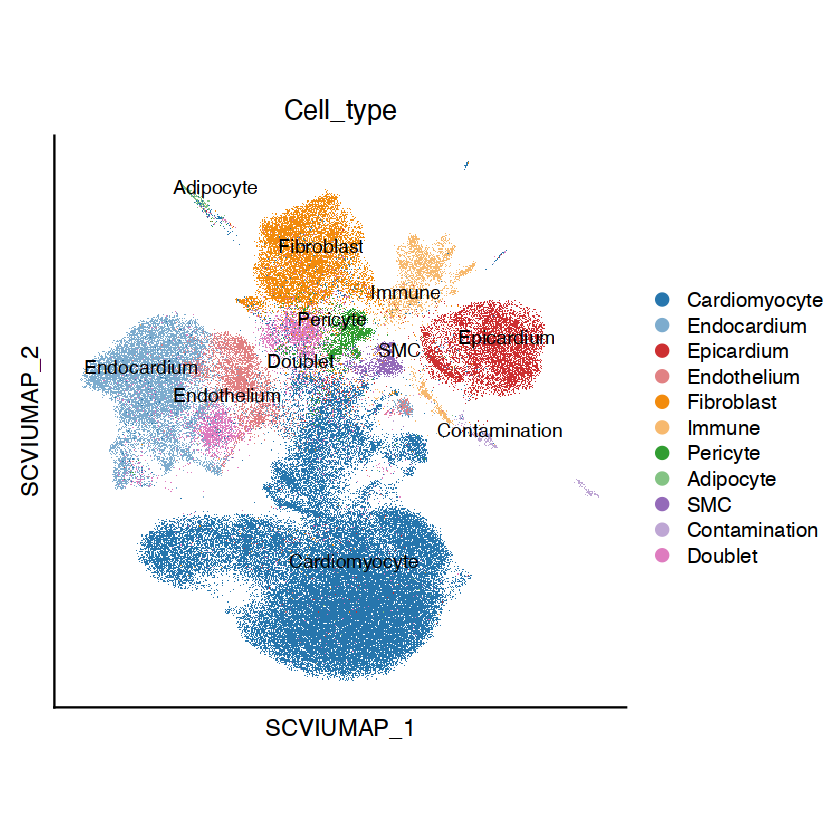

In [7]:
DimPlot2(srt.anno, group.by = 'Cell_type', cols = mycol_20, label = T, repel = T)

pdf 
  2

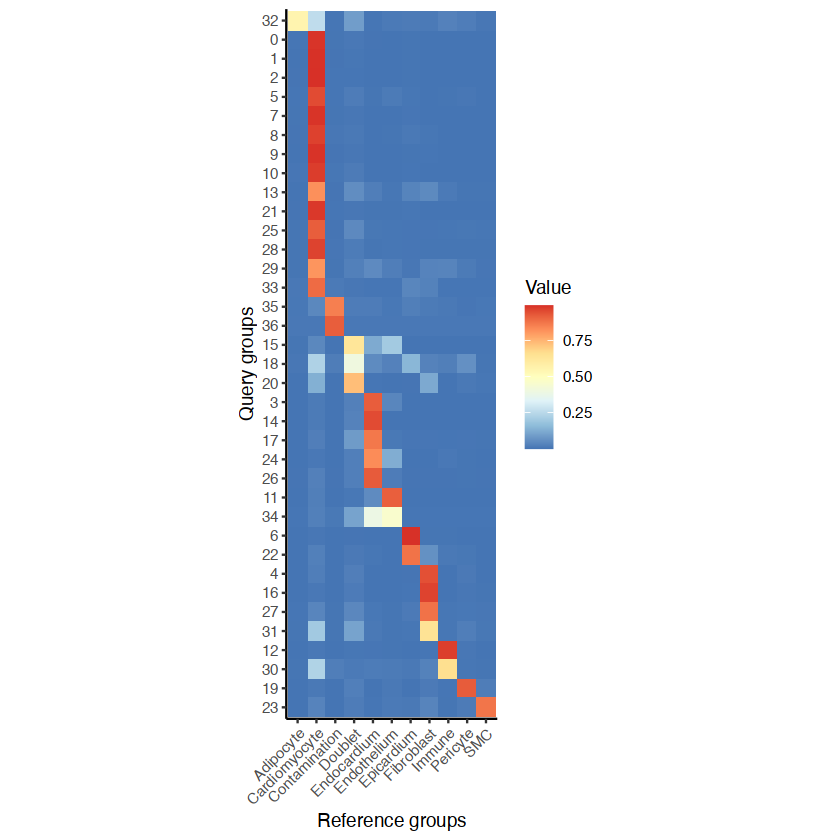

In [8]:
p <- MappingHeatmap(srt.anno, que_var = 'Cluster_leiden_res1.5', ref_var = 'Cell_type',
                    percentage = T, log10_scale = F, ref.disp.min = 0,
                    ref_order = NULL, que_order = NULL, center = T
)
p
PlotPDF('02.0.heat.Cell_type_prediction', 5, 10)
print(p)
dev.off()

In [9]:
DefaultAssay(srt) <- 'RNA'

markers_lvl1 <- c('Tnnt2',  'Nppa',           # CM
                  'Col1a1', 'Tcf21',          # CF
                  'Pecam1',  'Cdh5',          # EC
                  'Prox1',   'Flt4',          # LEC
                  'Acta2',   'Rgs5',          # SMC
                  'Pdgfrb', 'Vtn',            # Pericyte
                  'Upk3b',  'Wt1',            # Epicardium
                  'Npr3',   'H19',            # Endocardium
                  'Plp1',   'Nrn1',           # Schwann
                  'Nrsn1',  'Npy',            # Neuronal
                  'Tenm4',  'Car3',           # Adipocyte
                  'Ptprc',  'H2-D1',          # Immune
                  'Hba-a1', 'Hbb-bh1',        # RBC
                  'Mki67',  'Top2a')          # Mitotic
p <- FeaturePlot2(srt, features = markers_lvl1, ncol = 6, reduction = 'scVI_umap')
PlotPDF('02.1.feat.markers_lvl1', 30, 25)
print(p)
dev.off()

markers <- c( 'Col1a1', 'Tnc', 'Pi16', 'Tenm2', 'Fgf12', 'Nppa', 'Hcn1', 'Flt1',
              'Pecam1', 'Vwf', 'Emcn', 'Cd74', 'Acta2', 'Kcna1', 'Upk3b', 'Nrxn1', 'Flt4')
p <- FeaturePlot2(srt, features = markers, ncol = 5, reduction = 'scVI_umap')
PlotPDF('02.2.feat.markers', 25, 20)
print(p)
dev.off()
####--------------------------------------------------------------------------------------------------------------------

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

pdf 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

pdf 
  2

In [10]:
DefaultAssay(srt) <- 'RNA'

In [11]:
p <- FeaturePlot2(srt, features = c("Eno1","Crabp1","Pclaf","Tnni1","Myh7","Gyg","Myh6","Nppa","Tcap","Gsn",
                               "Dcn","Lum","Upk3b","Msln","C3","Plvap","Npr3","Ednrb","Gpihbp1","Ly6c1",
                               "Cd36","Ccl21a","Mmrn1","Lyve1","Rgs5","Kcnj8","Vtn","Acta2","Tagln","Myh11",
                               "Igkc","Ighm","Cd79a","Trac","Cd3e","Cd3d","Gzma","Ccl5","Nkg7","Xcl1","Klrk1","Cd7",
                               "S100a8","S100a9","Retnlg","Plac8","Chil3","Ms4a4c","C1qa","Mrc1","F13a1","Naaa","Cst3",
                               "Cd209a","Hbb-y","Hbb-bs","Hba-a1","Car2","Tmem14c","Mt2","Ppbp","Ctla2a","Nrgn","Prnp",
                               "Plp1","Apod","Stmn2","Nefl","Gap43","Car3","Cfd","Pck1","Alb","Apoa2","Fabp1"), 
                                ncol = 5, reduction = 'scVI_umap')
PlotPDF('02.3.feat.markers', 25, 60)
print(p)
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

pdf 
  2

In [12]:
#Idents(srt) <- 'RNA_snn_res.1'
#markers <- FindMarkers(object = srt, ident.1 = 33)
#deg <- markers[markers$p_val_adj < 0.05, ]
#deg$gene <- row.names(deg)
#WriteCSV(deg, '1.cluster24_markers')

In [13]:
## Annotation based on scVI integration with former version data
srt$Cell_type <- as.vector(srt$Cluster_leiden_res1.5)

srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(0,1,2,5,7,8,9,10,13,21,25,28,29,33)] <- 'Cardiomyocyte'
srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(26,24,17,14,3)] <- 'Endocardium'
srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(12,30)] <- 'Immune'
srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(6,22)] <- 'Epicardium'
srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(11)] <- 'BEC'
srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(4,16,27,31)] <- 'Fibroblast'


srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(23)] <- 'SMC'
srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(19)] <- 'Pericyte'


srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(32)] <- 'Adipocyte'
srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(34)] <- 'LEC'


srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(35, 36)] <- 'Contamination'
#srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(30)] <- 'B cell'

srt$Cell_type[srt$Cluster_leiden_res1.5 %in% c(15, 18, 20)] <- 'Doublet'  

In [14]:
srt$Cell_type <- factor(srt$Cell_type, levels = c(
        'Cardiomyocyte',
        'Endocardium',
        'Epicardium',
        'Fibroblast',
        'Immune',
        'Pericyte',
        'Adipocyte',
        'SMC',
        'BEC',
        'LEC',
        'Contamination',
        'Doublet'
))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



pdf 
  2

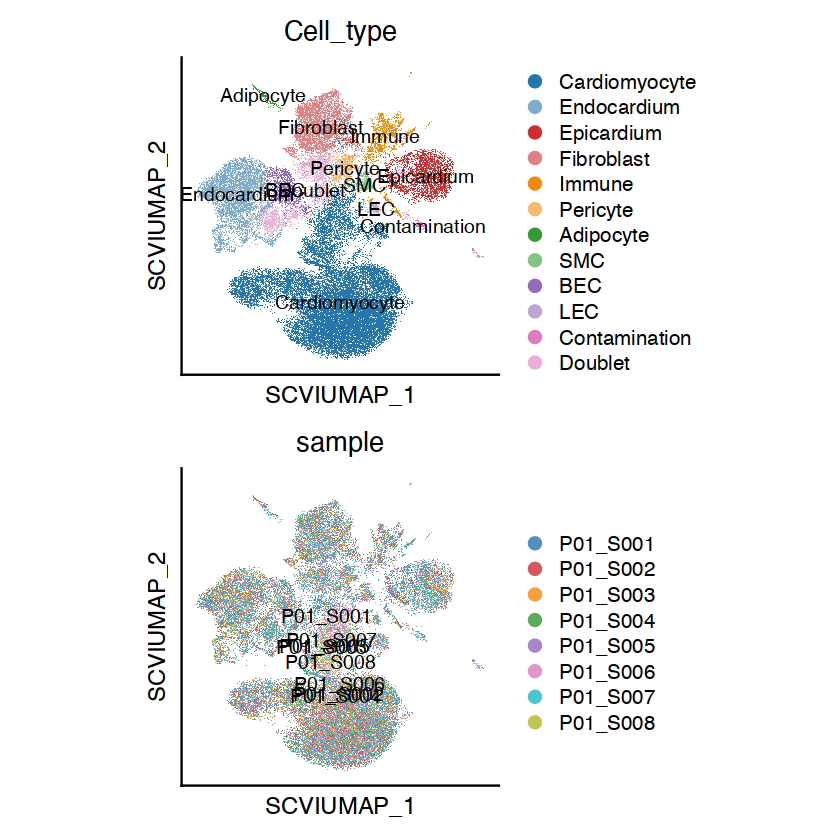

In [15]:
p1 <- DimPlot2(srt, group.by = 'Cell_type', cols = mycol_20, label = T)
p2 <- DimPlot2(srt, group.by = 'sample', cols = mycol_10, label = T)
p1/p2

PlotPDF('03.2.umap.modified_celltype_compare', 15, 20)
p1/p2
dev.off()

In [16]:
PlotPDF('03.3.umap.modified_celltype_split', 16, 8)
DimPlot2(srt, group.by = 'Cell_type', cols = mycol_20, label = T,split.by = 'group2')
#DimPlot2(sub.srt, reduction = 'sub_scVI_umap', label = T, cols = c(mycol_20[1:12], 'grey80'), group.by = 'Cell_state',split.by = 'group2')
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



pdf 
  2

In [17]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Calculate global cell type markers and score cells  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
Idents(srt) <- 'Cell_type'
mk <- FindAllMarkers(srt[, srt$Cell_type != 'Doublet'], assay = 'RNA',
                     logfc.threshold = 1, only.pos = T, return.thresh = 0.01, min.pct = 0.5)
mk <- mk[mk$p_val_adj < 0.01, ]
Table(mk$cluster)
WriteCSV(mk, '1.global_cell_type_markers')

gl <- split(mk$gene, mk$cluster)
srt <- AddModuleScore2(srt, features = gl, names = paste0('Score_', names(gl)), return_z = T, assay = 'RNA')

p <- FeaturePlot2(srt, features = paste0('Score_', names(gl)), raster = T, min.cutoff = 0, max.cutoff = 4, ncol = 5) +
        DimPlot2(srt, group.by = 'Cell_type', cols = mycol_20, label = T, repel = T)
PlotPDF('04.1.feat.cell_type_score', 30, 20)
p
dev.off()


Calculating cluster Cardiomyocyte

Calculating cluster Endocardium

Calculating cluster Epicardium

Calculating cluster Fibroblast

Calculating cluster Immune

Calculating cluster Pericyte

Calculating cluster Adipocyte

Calculating cluster SMC

Calculating cluster BEC

Calculating cluster LEC

Calculating cluster Contamination




Cardiomyocyte   Endocardium    Epicardium    Fibroblast        Immune 
          223           179           230           144           100 
     Pericyte     Adipocyte           SMC           BEC           LEC 
          113           184           105           182           176 
Contamination 
           99 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

pdf 
  2

In [18]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df <- srt@meta.data[,!grepl('^Cluster_leiden_res', colnames(srt@meta.data))]
saveRDS(df, 'integrated/PART10.annotated.srt_meta.rds')
saveRDS(srt, 'integrated/PART10.annotated.srt.rds')
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [20]:
p1 <- DimPlot2(srt, group.by = 'Cell_type', cols = c(mycol_20[1:19], 'grey20', 'grey35', 'grey50', 'grey90'),
               label = T, repel = T)
PlotPDF('02.2.umap.annotated', 10, 10)
p1
dev.off()

p2 <- DimPlot2(srt, group.by = 'group2', cols = mycol_10)
PlotPDF('02.3.umap.annotated_col_by_disease', 10, 10)
p2
dev.off()

p3 <- CountCellBarPlot(srt, group.var = 'group2', stack.var = 'Cell_type', percentage = T,
                       stack.color = c(mycol_20[1:19], 'grey20', 'grey35', 'grey50', 'grey90'))$plot
PlotPDF('02.4.bar.annotated_composition', 5, 10)
p3
dev.off()

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



pdf 
  2

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



pdf 
  2

`summarise()` has grouped output by 'Cell_type'. You can override using the
`.groups` argument.


pdf 
  2

In [21]:
p3 <- CountCellBarPlot(srt, group.var = 'group1', stack.var = 'Cell_type', percentage = T,
                       stack.color = c(mycol_20[1:19], 'grey20', 'grey35', 'grey50', 'grey90'))$plot
PlotPDF('02.5.bar.annotated_composition', 6, 6)
p3
dev.off()

`summarise()` has grouped output by 'Cell_type'. You can override using the
`.groups` argument.


pdf 
  2

In [22]:
srt.anno.clean <- srt[,srt$Non_ambiguous]

In [23]:
p3 <- CountCellBarPlot(srt.anno.clean, group.var = 'group1', stack.var = 'Cell_type', percentage = T,
                       stack.color = c(mycol_20[1:19], 'grey20', 'grey35', 'grey50', 'grey90'))$plot
PlotPDF('02.5.bar.annotated_composition.clean', 6, 6)
p3
dev.off()

`summarise()` has grouped output by 'Cell_type'. You can override using the
`.groups` argument.


pdf 
  2

## add celltype from immune subtype object

In [6]:
plan("multisession", workers = 12)
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Load data  ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt <- readRDS('integrated/PART10.annotated.srt.rds')
srt.backup <- srt
#srt <- srt.backup
#srt$Cell_state <- as.vector(srt$Cell_type)

In [4]:
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
####  Annotate Cell Type according the former version annotation ####
####~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~----
srt.anno <- srt
srt.tmp <- readRDS(file = "../mouse_v0/integrated/PART19.annotated.srt.rds")

In [9]:
srt$Cell_type <- as.character(srt$Cell_type)

In [12]:
srt$Cell_type[srt.tmp$Cell_state %in% c('T cell')] <- 'T cell'
srt$Cell_type[srt.tmp$Cell_state %in% c('B cell')] <- 'B cell'
srt$Cell_type[srt.tmp$Cell_state %in% c('Glial')] <- 'Glial'
srt$Cell_type[srt.tmp$Cell_state %in% c('Doublet')] <- 'Doublet'
srt$Cell_type[srt.tmp$Cell_type %in% c('Immune')] <- 'Myeloid'

In [14]:
srt$Cell_type <- factor(srt$Cell_type, levels = c(
        'Cardiomyocyte',
        'Endocardium',
        'Epicardium',
        'Fibroblast',
        'Myeloid',
        'T cell',
        'B cell',
        'Glial',
        'Pericyte',
        'Adipocyte',
        'SMC',
        'BEC',
        'LEC',
        'Contamination',
        'Doublet'
))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



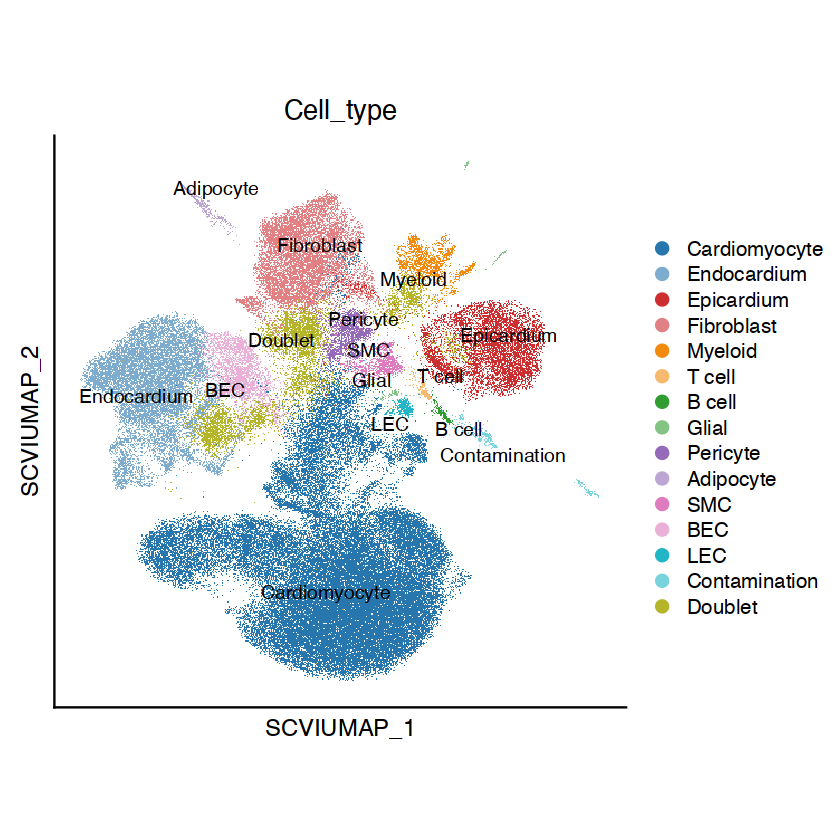

In [15]:
DimPlot2(srt, group.by = 'Cell_type', cols = mycol_20, label = T, repel = T)

In [16]:
df <- srt@meta.data[,!grepl('^Cluster_leiden_res', colnames(srt@meta.data))]
saveRDS(df, 'integrated/PART10.annotated.srt_meta.rds')
saveRDS(srt, 'integrated/PART10.annotated.srt.rds')